# **Logistic Regression**
## **Introduction**

### Now that we know about linear regressions, let's explore another powerful technique: logistic regression. While both share the word "regression," they serve different purposes in the modeling world. We'll uncover these distinctions and more as we proceed.

### In the previous notebook on linear regression, we aimed to predict a continuous outcome variable. However, there are many real-world scenarios where the outcome isn't continuous but categorical, specifically binary (e.g., Yes or No, Positive or Negative, 1 or 0). Enter logistic regression, the go-to method for binary classification tasks.

### Unlike linear regression, where the outcome is continuous, logistic regression deals with probabilities. Specifically, it estimates the probability that a given input point belongs to a certain category. At its core, logistic regression is about drawing a boundary (decision boundary) that best separates the two categories based on the input features.

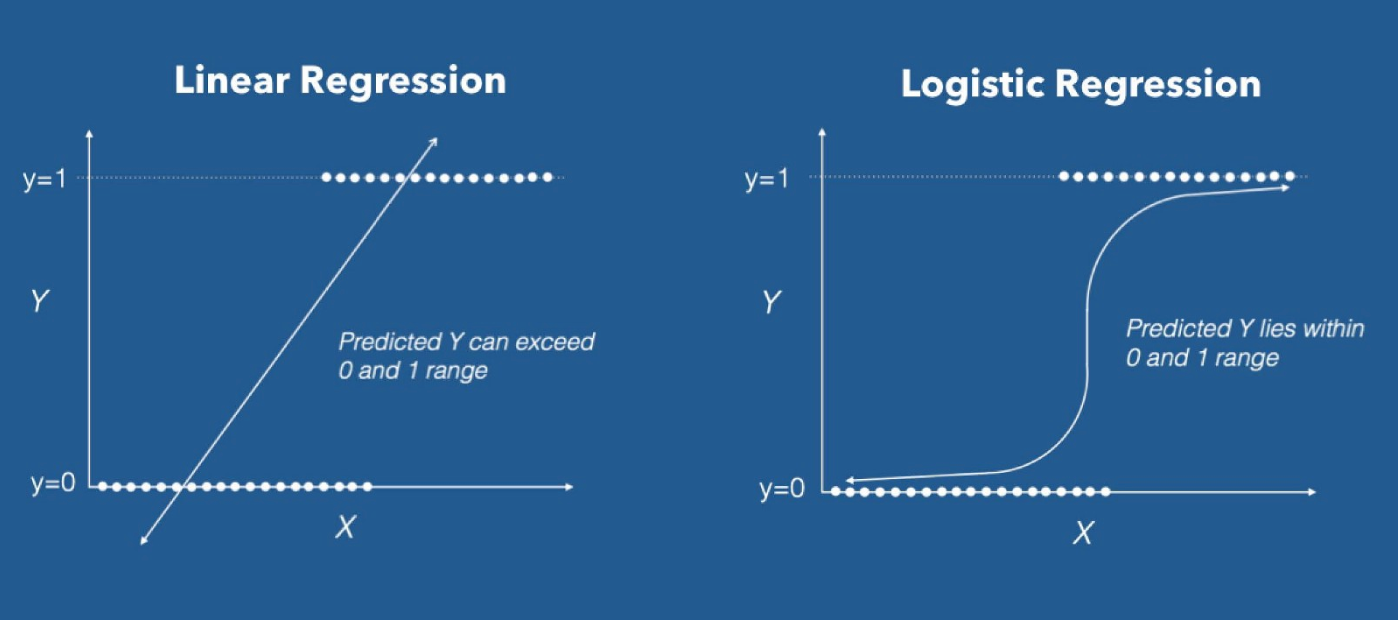


### However, a logistic regression model is still a model, so we follow the same train, test, deploy pipeline as we talked about previously. The tool changes, the workflow does not


### Lets discuss some of the 'under the hood' operations of a logistic regression. While the linear regression equation might look familiar as $\hat{Y}=X\theta$, the logistic regression equation undergoes a transformation to handle probabilities represented by $\hat{y}$ = $\Sigma(\Theta^TX)$ = $\frac{1} {1 + e^-\Theta^Tx }$ . This transformation ensures that the output of the model lies between 0 and 1, representing probabilities. The function used here is the sigmoid or logistic function, which gives the logistic regression its name. 

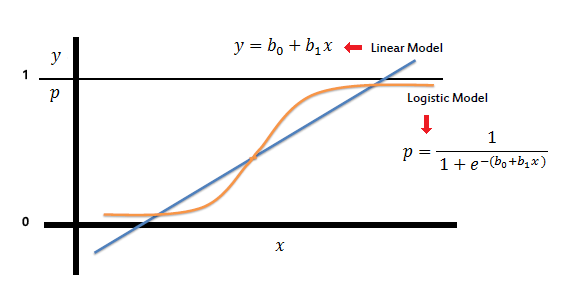

### Don't be confused by all the symbols! At its fundamental level, the logistic regression is providing an output between 0 or 1 in order to predict the category a certain input belongs to. In our case, based on the inputs we provide, we will predict whether or not the individual is at risk of heart failure (1) or not (0). 

### Evaluating a logistic regression model's performance is slightly different from linear regression:, and we will take a look at all of these in detail later on in the notebook, but we just want to introduce them now.

1. ### Accuracy: The proportion of total predictions that are completely correct. It's the ratio of the number of correct predictions to the total predictions.
2. ### Precision: Out of the samples predicted as positive, how many are actually positive?
3. ### Recall (Sensitivity): Out of the actual positives, how many are predicted as positive?

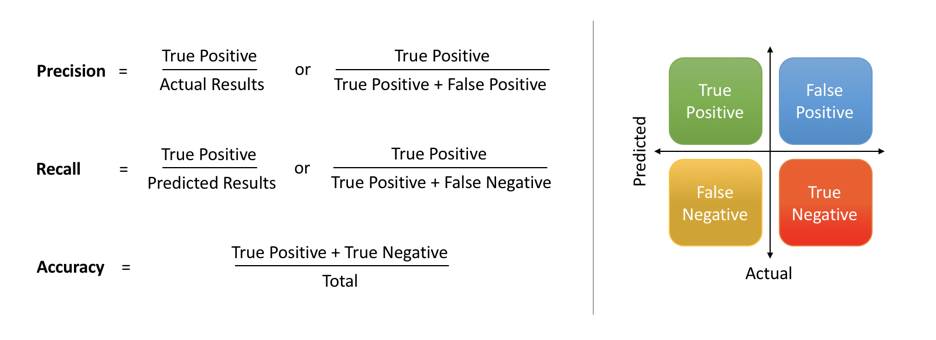

4. ### AUC-ROC Curve: A graphical representation showing the performance of a classification model at all classification thresholds. The closer the curve is to the top-left corner, the better the model's performance.

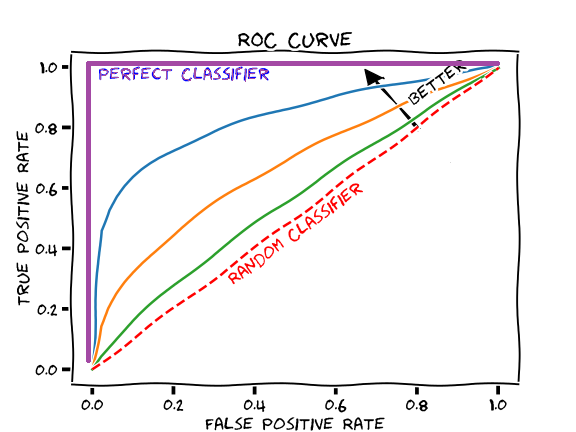

## **Import Stuff**

In [ ]:
%pip install seaborn
%pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE


### Same data preparation code as in the other notebooks. You can skip this- we are just applying the same cleaning and preprocessing we did before in this notebook to get the data in the cleaned state.

In [ ]:
df = pd.read_csv('heart_disease.csv')

df.dropna(inplace=True)

categorical_columns = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart_stroke']

for column in categorical_columns:
    df[column] = df[column].astype('category')
        
text_columns = ['Gender', 'education', 'prevalentStroke', 'Heart_stroke']

for column in text_columns: 
    df[column] = df[column].str.lower()
    
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['education'] = df['education'].map({'uneducated': 0, 'primaryschool': 1, 'graduate':2, 'postgraduate':3})

### In the upcoming code block, we've defined a function doRegression to perform logistic regression and evaluate its performance. As there are more lines of code to run the logisic regression and we will be doing it a few times it is easier to just make a function we can reuse.

### The procedure is very similar to what you saw in the linear regression notebook. We will:
1. ###  Split the dataset (80/20 train/test) using `train_test_split` from `sklearn`
2. ### Initialize the model using `LogisticRegression()` from `sklearn` which we imported earlier
3. ### Fit the model using our training data `log_model.fit(X_train, y_train)`
4. ### Make predictions using our x test data (in this case our predictions are binary as it is a logistic regression) using `y_pred = log_model.predict(X_test)`
5. ### Evaluate the model: We'll be using several metrics to understand our model's performance which will be returned from this function

- ### Confusion Matrix: A table showcasing true positives, true negatives, false positives, and false negatives.
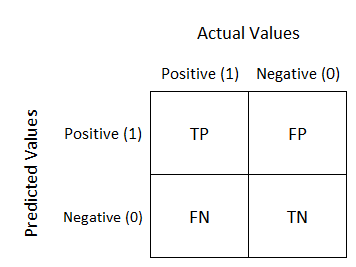
- ### Classification Report: Contains key metrics such as precision, recall, and the F1-score.
- ### ROC-AUC Score: Represents the model's ability to distinguish between the positive and negative classes.
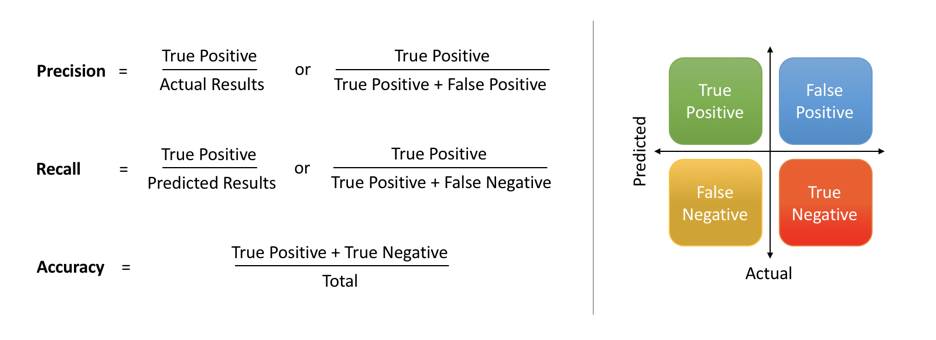

### You might be asking, of all of these metrics, which one is most important to determine how well my model is doing? The answer is yes. Honestly, all of these need to be taken into consideration when evaluating your model, and if you look at any in isolation you may get a distorted view (as we will soon see)! Lets work through the data and see this process in action

In [ ]:
# Import the necessary metrics for evaluation
from sklearn.metrics import classification_report

# Define a function 'doRegression' to perform logistic regression
# The function accepts predictor variables 'x' and the outcome variable 'y'
def doRegression(x,y):
    # Split the data into training and testing sets using a 80-20 split
    # The 'random_state' parameter is set to 42 for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Instantiate a Logistic Regression model
    # Logistic Regression is a statistical model used to model a binary outcome variable based on one or more predictor variables
    log_model = LogisticRegression(max_iter=10000) #max_iter is the maximum number of iterations the model will train for. This is parameter that you can tune.
    
    # Fit the model to the training data
    # The model 'learns' the relationship between the predictor(s) and the outcome
    log_model.fit(X_train, y_train)
    
    # Use the model to predict outcomes for the test set
    y_pred = log_model.predict(X_test)

    # Create a confusion matrix from the actual and predicted outcomes
    # A confusion matrix is a table that is used to evaluate the performance of a classification model. We will discuss this in detail later
    # Its not that confusing we promise!
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate predicted probabilities for the positive class
    # These probabilities provide insight into the confidence of the predictions
    # Need this for ROC-AUC (another metric we will talk about in detail later)
    y_pred_proba = log_model.predict_proba(X_test)[:,1]

    # Compute the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) from prediction scores
    # ROC-AUC is a popular metric for evaluating classifier performance
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Return a classification report (precision, recall, f1-score, support), confusion matrix and ROC-AUC score
    return classification_report(y_test, y_pred), conf_matrix, roc_auc


### Now lets set up an initial logistic regression. For this we will be starting small and just using a single predictor (cigarettes smoked per day in this case). We will use cigarettes smoked per day (`x`) to try and predict whether or not the individual will develop heart stroke (`y`).

### We will move on to some more complex analyses in a bit, but this is just to get our feet wet

In [ ]:
# Define the predictor (what we believe could help us predict whether a heart stroke might happen) and target variables for the analysis
x = df[['cigsPerDay']]  # predictor: 'cigsPerDay' column from the dataframe df

y = df['Heart_stroke']  # target variable (what we are interested in predicting): 'Heart_stroke' column from the dataframe df

# Call the previously defined 'doRegression' function, passing the predictor and target variables as parameters
# This function will train a logistic regression model using the given predictor and target variables, 
# and it will return a classification report (precision, recall, f1-score, support), a confusion matrix, and the ROC-AUC score.
# See the function for details 
classification_report_output, conf_matrix, roc_auc = doRegression(x,y)

tn, fp, fn, tp = conf_matrix.ravel()
print(tn,fp,fn,tp)
# Print the classification report, confusion matrix, and ROC-AUC score

# The confusion matrix provides a visual look at the performance of the model by showing the true positives, 
# true negatives, false positives, and false negatives.
print('Confusion Matrix \n', conf_matrix)

# The classification report includes metrics such as:
# precision (true positives divided by all positives), 
# recall (true positives divided by the number of true positives plus the number of false negatives)
# F1 score (a weighted average of precision and recall).
print('Classification Report \n', classification_report_output)



# The ROC-AUC score represents the model's ability to distinguish between the positive and negative classes. 
# It ranges from 0.5 to 1, where 0.5 indicates a model that performs no better than random chance, and 1 indicates a perfect model.

print('ROC-AUC \n', roc_auc)


### Well, at least the code ran so that is good. Let's break down these results in probably horrific detail. This will get a little repetitive, but repetition builds habits!

### **Confusion Matrix**
### Lets first explain what we are looking at so you can interpret it without having to consult an imge reference. The *rows* represent actual classes (row 1: 0 (no heart stroke), row 2: 1 (heart stroke)) and the columns represent predicted classes (column 1: 0 (PREDICTED no heart stroke), column 2: PREDICTED heart stroke). 

### Right off the bat, this looks not great, because our model didn't predict ANY cases of heart stroke at any given time. If we think carefully about the makeup of the matrix we will see that we had 610 TRUE negatives, 122 FALSE negatives, and 0 true or false positives. Lets move on to the classification report which summarizes this in usable terms for us.

### **Classification Report**
### The confusion matrix is not really a useful tool on its own as some number crunching is required to get reportable observations (precision, recall, etc.). The classification report is a handy tool which does this automatically for us.
- ### Precision quantifies the accuracy of predictions. It's the ratio of correctly predicted positive observations to the total predicted positives, aka, for class 0 (no heart stroke) $Precision$ = $\frac{True Positives (class 0)} {True Positives (class 0) + False Positives (class 0)}$ = $\frac{610} {610 + 122}$ = .83. For class 1 (heart stroke) $Precision$ = $\frac{True Positives (class 1)} {True Positives (class 1) + False Positives (class 1)}$ = $\frac{0} {0 + 0}$ = divide by 0 error reported as 0.
- ### Recall (Sensitivity) shows how many of the actual positive cases we were able to catch with our model. For class 0 (no heart stroke): $Recall$ = $\frac{True Positives (class 0)} {True Positives (class 0) + False Negatives (for class 0)}$ = $\frac{610} {610 + 0}$ = $.83$. For class 1 (heart stroke) $Recall$ = $\frac{True Positives (class 1)} {True Positives (class 1) + False Negatives (class 1)}$ = $\frac{0} {0 + 0}$ = divide by 0 error reported as 0.
- ### F1 Score is the weighted average of Precision and Recall. It's useful when you want a balance between these two metrics. For class 0, the F1-Score =  $\frac{2 x (Precision x Recall)} {Precision + Recall}$ = $\frac{2  (.83 * 1)} {.83 + 1}$ = $.91$
- ### Support is the number of *actual* occurrences of the class in the specified dataset. Here, class 0 has 610 occurrences, and class 1 has 122 occurrences.
- ### Accuracy provides an overall idea of how many predictions were correct. $Accuracy$ = $\frac{True Positives + True Negatives} { Total Observations}$ = $\frac{0+610}{732}$ =$.83$  
- ### Macro Avg and Weighted Avg are averages of the above metrics. Macro avg takes a simple average, treating both classes equally. Weighted avg considers the number of instances (support) for each class. 

### **ROC-AUC**
- ### The ROC-AUC score is 0.5113. This value is a little above 0.5, which is essentially random guessing. The score being just above 0.5 indicates the model has a very slight capability to distinguish between the positive (class 1) and negative (class 0) outcomes.

### Tying this all together, we learn a *very* important lesson here about understanding the metrics used to evaluate models, both your own, and others. If you just took a look at this, not understanding anything and saw accuracy of 83%, you might be inclined to say you crushed and have a super good model. This, however, we mpw know not to be true *at all*. Our model was accurate 83% of the time, but that was simply because it *never* predicted anything to be positive and instead just got all of the negatives right totally on accident.

### Fortunately, there are some ways to improve this! This section above though is one of the most important lessons you can learn about data science, and that is to looks at multiple different evaluations of your model to get a complete picture of what is going on, and not try and fudge your numbers to make it look good!


## **Feature Engineering**

### Lets start on the journey of trying to make this model better. Before we were just using a single feature (cigarettes per day) to try and predict heart stroke occurrence. 

### Based purely on intuition, we know this is not how the world works and that this feature shouldn't be enough to predict such a metric. Fortunately, we have a lot more data available to us, and we can try and build our model using more features. We could try and use all of the features available to us, but this isn't always beneficial (potential overfitting, increased computation time, etc.)

### This brings us to feature engineering, which is the process of identifying which features are most important in our dataset to make our desired predictions. More specifically, we want to do something called *dimensionality reduction* in order to reduce the dimensionality (or features) from our main dataset and get the best ones for our desired analysis. Technically, feature engineering can also include the creation of new features, and what we are doing is better called *feature selection*

### There are many different techniques to do this (principal component analysis, singular value decomposition, and linear discriminant analysis, to name a few popular ones"), but we will be using a method called recursive feature elimination

### We will initially train the model with every feature (variable), and then gradually drop out the least important ones until we have distilled down the most important ones (we can set the number of how many features we want left). Every time the model retrains and evaluates its performance will be left with a more distilled group of features with which to work with.

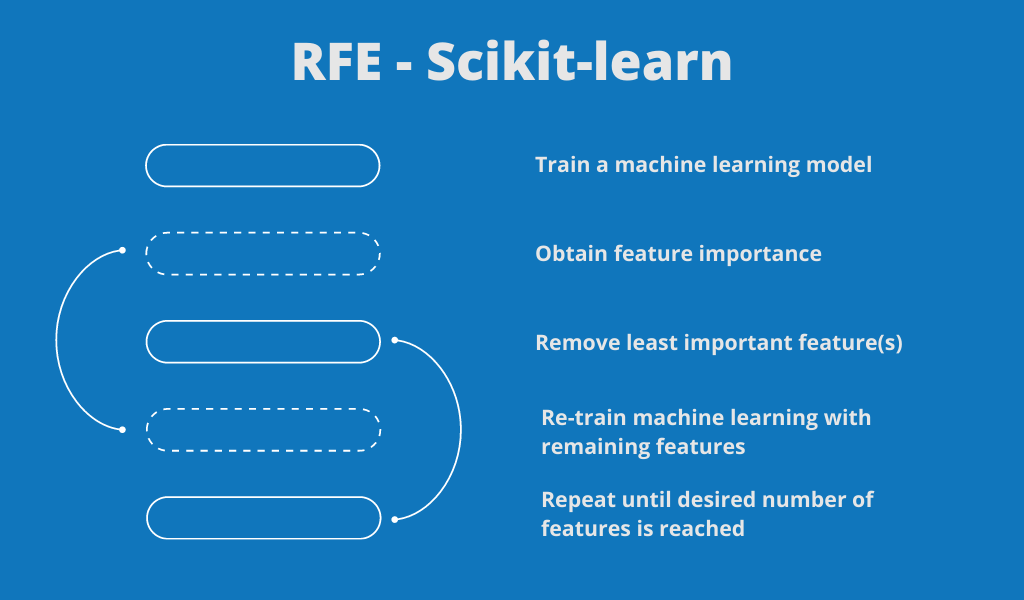

### A quick note here, feature engineering (and RFE) is an *extremely* deep topic and we are hardly scratching the service here. In addition, there are almost certainly better ways to analyze this data. However, we want this to serve as an introduction to the idea so you can move forward with your own data (and through self study) to get the most out of your own data.

### As we want to do RFE, let's rebuild our doRegression function to incorporate this new feature (pun intended).

1. ### We still split the data into train and test using `train_test_split`- nothing new here
2. ### We still initialize our model (`LogisticRegression()`)
3. ### The first difference is now we also initialize our recursive feature selector. We pass this our model, the number of features to select (arbitrary selection determined by domain knowledge/ trial and error), and the number of features to remove after each training iteration (step)
4. ### Now, as opposed to fitting our logistic regression model like we did earlier, we fit our `selector` with the training data
5. ### We then print the features selected (note, we don't have to do this but it is nice to see which ones 'won')
5. ### After RFE has done it's thing we then have to remake our train and test data based on the selected features, and we do that using `selector.fit(data)`
6. ### And the rest all stays the same. While it is good to know what is going on under the hood here (and you will learn with time and practice), the logical high level steps are not all that complex. If you intuitively know what RFE is doing, this code will make sense, and allow you to implement it

In [ ]:
from sklearn.metrics import classification_report

# This function performs Logistic Regression with Recursive Feature Elimination (RFE) to select the top 5 most relevant features
def doRegressionWithRFE(x,y, num_features):
    
    # Split the input data into training and testing datasets, with 80% of data used for training and 20% used for testing
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    log_model = LogisticRegression(max_iter=10000)

    # Initialize RFE with the logistic regression model and specify to select top 7 features
    selector = RFE(log_model, n_features_to_select=num_features, step=1)

    # Fit the RFE selector on the training data
    selector = selector.fit(X_train, y_train)

    # Print the features selected by RFE. This is achieved by creating a series combining feature names and their selection status, then printing those selected.
    selected_features = pd.Series(selector.support_, index=X_train.columns)
    print(selected_features[selected_features==True])

    # Transform the training and test data sets so only the selected features remain
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Fit the Logistic Regression model on the selected features of the training data
    log_model.fit(X_train_selected, y_train)

    # Predict the outcomes for the test set
    y_pred = log_model.predict(X_test_selected)

    # Print the confusion matrix, which gives a summary of the prediction results on the test data
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Compute the predicted probabilities for the positive class
    y_pred_proba = log_model.predict_proba(X_test_selected)[:,1]

    # Print the model's accuracy on the test set
    print('score', log_model.score(X_test_selected,y_test))

    # Compute ROC-AUC score, which quantifies the model's ability to distinguish between classes
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Return a detailed classification report, the confusion matrix, and the ROC-AUC score
    return classification_report(y_test, y_pred), conf_matrix, roc_auc


### We have one final thing to do before we can actually see how RFE works- deal with our categorical data. When we did the first model using only cigs per day feature that was numerical data, but now as we want to try and use a larger subset of our data (a lot which is categorical) we have to help the computer deal with this and convert our categorical data to numerical. 

### **One Hot Encoding** 
### In additition to being a fun name, OHE allows us to very easily convert categorical data to a numerical format that can be fed into machine learning algorithms. The process involves converting each unique category value into a new column and then using a binary value to indicate the presence of that category. This is easier explained via a picture, so here you go:

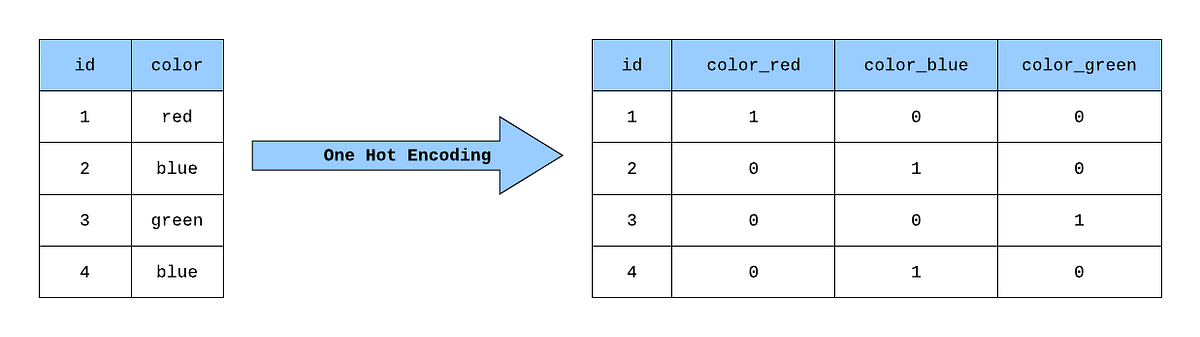

### **Before you go on...**
### Note here that we did not apply the same data preprocessing techniques that we did in the prior section in here. The reason for this has to do with the differences between ordinal mapping (mapping certain categorical labels to certain values) vs OHE and now it is understood by the computer. For something like gender, doing simple ordinal mapping would represent one gender as a 1 and one as a 0. This would provide more 'weight' to whichever one you set as a 1 to the computer. For things that are truly binary (smoking vs not, etc), or there is a clear order to the data labels (levels of severity, for example), this is a great approach as you do not have to add more columns to your dataframe and can save memory. For things like gender where we do not want to weight one more than the other, ordinal mapping is a more appropriate choice as it removes the notion of rank/order. Thinking about these things when processing your data for machine learning is critically important as it will affect your outcomes and the generalizability of your model.

In [ ]:
# Convert categorical variables in the dataset into indicator (or dummy) variables. Each unique value in the original column is
# expanded into a new column that takes binary values (0, 1)
#  gender   -->one hot encoding --> gender_male  gender_female
#0   male                               1              0
#1 female                               0              1
#2   male                               1              0
#3 female                               0              1
df_encoded = pd.get_dummies(df)
df_encoded.info() # note the introduction of the new columns


### Now we are ready to roll. We will follow the same procedure as above except switching out the original function for our new `doRegressionWithRFE`, and also using the one hot encoded `df_encoded` which we just made 

In [ ]:
# Call the function to perform Logistic Regression with RFE
# For predictors (x), we use all columns in the dataframe after converting categorical variables to dummy variables, except the target column 
# 'Heart_stroke'. We didn't do this before because we were only training with one feature.
x = df_encoded.drop(columns=['Heart_stroke'])

# The target variable (y) is 'Heart_stroke'
y = df_encoded['Heart_stroke']

# Call the function defined previously, passing in the predictor variables, the target variables, and the number of features to select
# The function returns a classification report, a confusion matrix, and the ROC-AUC score
classification_report_output, conf_matrix, roc_auc = doRegressionWithRFE(x,y, 5)

print('Classification Report \n', classification_report_output)
print('Confusion Matrix \n', conf_matrix)
print('ROC-AUC \n', roc_auc)

### Lets break this one down in similar detail to as we did earlier

### **Precision and Recall for Class 0**

- ### For class 0 (no heart stroke), the precision is high at 0.83, which means that of all the instances predicted as class 0, 83% of them were correctly predicted. The recall is even better at 1.00, meaning the model correctly identified all of the true class 0 instances.

### **Precision and Recall for Class 1**
- ### For class 1 (heart stroke), the precision is quite low at 0.40. This means that of all the instances predicted as class 1, only 40% of them were correct. The recall for class 1 is abysmally low at 0.02, meaning the model correctly identified only 2% of all the true class 1 instances. This implies the model is barely identifying any of the true positive cases for heart strokes.

### **Accuracy**

- ### The overall accuracy of the model is 0.83. While this might seem decent, it's important to note that the dataset is imbalanced, with a lot more class 0 instances than class 1. Hence, the model can achieve high accuracy just by predicting the majority class. However, we know that accuracy is not always the best metric to evaluate the performance of models on imbalanced datasets.

### **Confusion Matrix**
- ### The confusion matrix further validates the above observations. The model predicts 607 true negatives and 3 false positives. However, it also predicts 120 false negatives and only 2 true positives. This means it's hardly identifying the positive cases, which are arguably the most critical in medical scenarios.

### **ROC-AUC**
- ### The ROC-AUC score is 0.6435. This metric tells us about the model's capability to distinguish between the positive and the negative class. An ROC-AUC score of 1 is perfect, while 0.5 is equivalent to random guessing. A score of 0.6435 suggests there's room for improvement, but the model is performing above random guessing.

### So overall, we have some definite improvement, which we LOVE! However, we can probably go up even more!

## **Scaling and Class Imbalance** 

### In many machine learning algorithms, especially those that rely on distance calculations or gradient descent (like logistic regression- see module 5 for more details!), having features on different scales can cause the optimization process to be slow or not converge at all. In our dataset, we have features such as gender, which is one hot encoded (values 0 or 1), and cholesterol levels which can rise as high as 600. Such vast differences in scale can hinder model training.

### To combat this, we can employ feature scaling techniques. One common method is "z-score standardization" using StandardScaler from sklearn. This method transforms features to have a mean of 0 and a standard deviation of 1. It is worth noting that while standardization is our chosen method here, there are other techniques like normalization available in sklearn for similar purposes.

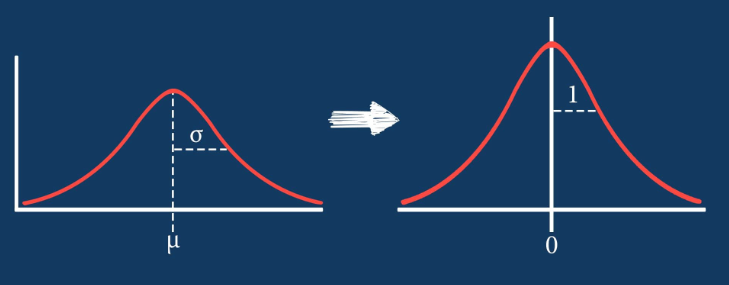

### Class imbalance is another challenge. Based on our previous analysis, our test dataset comprises 610 instances without heart strokes and 122 instances with heart strokes. This 5:1 ratio is a stark imbalance. Such imbalances can lead to models predicting the majority class more often, resulting in compromised recall or precision for the minority class.

### Fortunately, sklearn offers a mechanism within the logistic regression model to counteract this. By adjusting class weights, we can "instruct" the model to give more importance to the minority class, mitigating the bias arising from the imbalance.

### Lets start by remaking our logistic regression function, *again*. All we did here was add `class_weight="balanced"` to the line `log_model = LogisticRegression(max_iter=10000, class_weight="balanced")`. 

### To scale the data we initialized a StandardScaler object using `scaler = StandardScaler()`, scale the data using `scaler.fit_transform(x)`, and convert the scaled data back into a df so we can actually use it in the regression (via `x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)`). Note that we only scale using the information from the training data. As the scaling operation uses the all of the rows for a given feature, if we scale on the whole set prior to splitting test and train we allow the training data to 'see' some of the test data, which we never want to do (this concept is called data leakage and is explained more in the next notebook).


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

def doRegressionWithRFE_Balanced(x, y, num_features):
    # Split the input data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Standardize the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Use the statistics of the training data to standardize the test data
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Logistic Regression model with 'balanced' class weight
    log_model = LogisticRegression(max_iter=10000, class_weight="balanced")

    # RFE
    selector = RFE(log_model, n_features_to_select=num_features, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    
    # Get selected features
    selected_features = pd.Series(selector.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    # Transform the training and test data using only the selected features
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    # Fit and predict
    log_model.fit(X_train_selected, y_train)
    y_pred = log_model.predict(X_test_selected)
    
    # Metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    y_pred_proba = log_model.predict_proba(X_test_selected)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return classification_report(y_test, y_pred), conf_matrix, roc_auc






### Lets give it a try!

In [ ]:

# For predictors (x), we use all columns in the dataframe after converting 
# categorical variables to dummy variables, except the target column 'Heart_stroke'.
x = df_encoded.drop(columns=['Heart_stroke'])

# The target variable (y) is 'Heart_stroke'
y = df_encoded['Heart_stroke']

# Call the function defined previously, passing in the scaled predictor variables, 
# the target variables, and the number of features to select
classification_report_output, conf_matrix, roc_auc = doRegressionWithRFE_Balanced(x, y, 7)

print('Classification Report \n', classification_report_output)
print('Confusion Matrix \n', conf_matrix)
print('ROC-AUC \n', roc_auc)


### Lets break these results down and see how we did
### **Classification Report**
- ### Precision for Class 0 (No Heart Stroke): Out of all the instances predicted as "No Heart Stroke", 91% of them were correct.
- ### Precision for Class 1 (Heart Stroke): Out of all the instances predicted as "Heart Stroke", only 29% were correct. This implies that many of the predictions for this class are false positives.
- ### Recall for Class 0 (No Heart Stroke): Of all the actual "No Heart Stroke" instances, 69% were correctly predicted by the model. This means that 31% of the true negatives were missed (false negatives).
- ### Recall for Class 1 (Heart Stroke): Of all the actual "Heart Stroke" instances, the model correctly predicted 65%. This indicates an improvement in identifying positive cases compared to previous models (given that you mentioned an earlier recall of 2% for this class).
- ### Accuracy: This is the overall percentage of correct predictions. The model's accuracy is 68%, meaning it correctly predicted the outcome for 68% of all instances.

### **ROC-AUC**
- ### The ROC-AUC score is 0.7053, above 0.5, suggesting that the model has a decent ability to distinguish between the two classes, but there's still room for improvement.

### After scaling the features using StandardScaler and trying to address class imbalance, the model's recall for detecting heart strokes (Class 1) has significantly improved! That is awesome!! However, precision for this class remains low, suggesting that while the model is better at identifying positive cases, it's doing so at the expense of making more false positive errors. This might actually be acceptable in a medical context where false negatives (missing a real case) are more costly than false positives (identifying a non-case as a case), however it is most important to be able to assess the true performance of the model and make those decisions based on the specific context in which the model will be used. 

### We also brought up our ROC-AUC a good bit as well, which also means we did a better job at discriminating between a patient developing heart stroke or not. Interestingly, however our accuracy was actually lower than in our first model (83% vs 68%). If we were only looking at the accuracy we would think this model is worse, however, given its ability to actually make predictions of positive cases it is indeed a far superior model

## **Outro**
### We hope you enjoyed this primer on logistic regression! It remains an extremely powerful tool even in light of new, flashier tech such as deep learning. Knowing the fundamentals here will only assist you on your journey!

### It is worth noting also that there is *so* much deeper you can go with even this project. There are many other techniques (resampling, more complex feature engineering, regularization, etc.) that could almost definitely be employed here to improve the performance on this dataset! We absolutely encourage you to try such things at home, and see where you go. The best way to learn is just by trying and failing. Have fun!!!